In [27]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
%matplotlib inline
import scipy.stats as stats
import seaborn as sns; sns.set_context('notebook')
figsize=(45,10)
from IPython.core.pylabtools import figsize
figsize(14.5,6.5)
from sklearn import linear_model



# Linear Bandit Solver

### Bayesian Linear Regression

The Idea is to combine thompson sampling with a linear model in order to utilize the context that is given by the world.

In order to understand how a linear model and thompson sapling go together, we'll first do a short excursion towards Bayesian linear Regression:


[[ 92.5 ]
 [ 62.5 ]
 [ 13.75]] [ 2667.76256877  2190.6191348   1444.2375855 ]


(25, 1)

C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


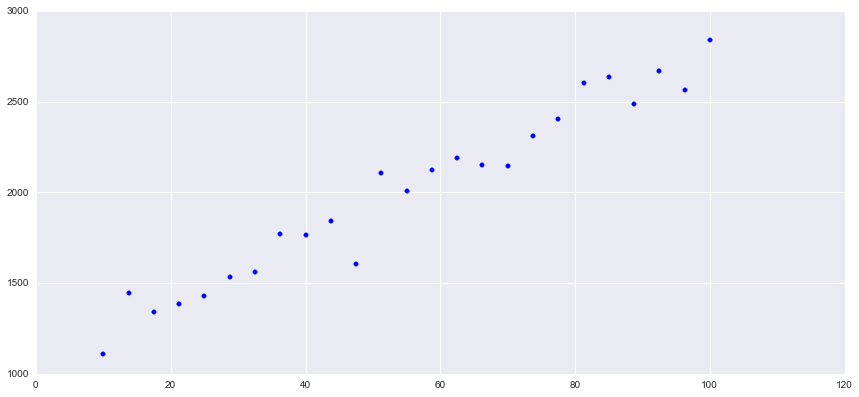

In [28]:
num_features = 1
num_data = 25

from sklearn.datasets import make_regression 

X1 = np.zeros((num_data,num_features))
for i in range(num_features):
    X1[:,i] = np.linspace(10,100,num_data).T

np.random.shuffle(X1)
def evaluate(X):
    y = 0
    #coefs = np.random.normal(0,10,X.shape[0])
    try:
        for i in range(X.shape[0]):
            np.random.seed(i)
            y += X[i]*np.random.normal(0,10)
        return y
    
    except:
        print('ex')
        return  X*12
y1 = []
for i in range(num_data):
    y1 += [evaluate(X1[i,:])]
y1 = np.array(y1).flatten()+np.random.normal(0,90,X1.shape[0])

X,y,coef = make_regression(num_data,num_features,noise   = 20,shuffle=True, coef = True)
y = -y
X = X1
y = y1
y = y+1000
print(X[:3],y[:3])
if num_features ==1:
    plt.scatter(X,y,color = 'blue')
    

X.shape

In [29]:
X.shape

(25, 1)

In [30]:
class BayesRegr(object):
    def __init__(self,num_features,alpha = .1,beta = .1,v=100,fit_intercept=False):
        self.fit_intercept = fit_intercept
        self.num_features = num_features
        if self.fit_intercept == True:
            self.num_features += 1
            
        self.B = np.eye(self.num_features)*alpha
        self.Binv = np.linalg.inv(self.B)
        #print(self.num_features)
        self.f = np.atleast_2d(np.zeros(self.num_features))#np.array([0,0]) #np.zeros(shape=(num_features,))
        #print(self.f)
        self.mu = np.zeros(num_features)
        self.beta = beta
        self.v = v
        
    def add_intercept(self,X):
        if self.fit_intercept==False:
            return X
        else:
            X_new= np.atleast_2d(np.insert(X,0,1))
            #print(X_new.shape)
            #print(X_new.T.shape)
            return X_new.T#np.atleast_2d(np.append(X[::-1],1))#[::-1])    
    def observe_x(self,x,y):
        y = np.atleast_2d(y)
        x = self.add_intercept(x)
        #print(self.B.shape,x.shape)

        self.B += np.outer(x,x)
        #print(x.T.shape,y.shape)
        #print(np.dot(x,y))
        self.f += np.dot(x,y).T
 
        
    def train(self,X,y,shuffle = True):
        index = list(range(X.shape[0]))
        if shuffle ==True:
            np.random.shuffle(index)
        for i in index:
            self.observe_x(X[i],y[i]) 
            
    def predict_ML_x(self,x):
        beta = np.linalg.inv(self.B).dot(self.f.T)
        x = self.add_intercept(x)
        try:
            return x.T.dot(beta)[0][0]
        except:
            y_hat = x*beta
            return y_hat[0]

        
    def predict_ML(self,X):
        beta= np.linalg.inv(self.B).dot(self.f.T)

        y = []
        try:
            for i in range(len(X)):
                x = X[i]
                y += [self.predict_ML_x(x)]
                #y +=[x.dot(beta)]
                return y
        except:
            X = self.add_intercept(X)
            return X.T.dot(beta)
            
    def draw(self):
        B_inv = np.linalg.inv(self.B)
        mu_t = B_inv.dot(self.f.T)
        dist = stats.multivariate_normal
        #print(mu_t.shape,B_inv)
        return dist.rvs(mean=mu_t.flatten(),cov=self.v**2*B_inv)

        

error of ols: 244771, 
error of predictive mean: 246919


C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


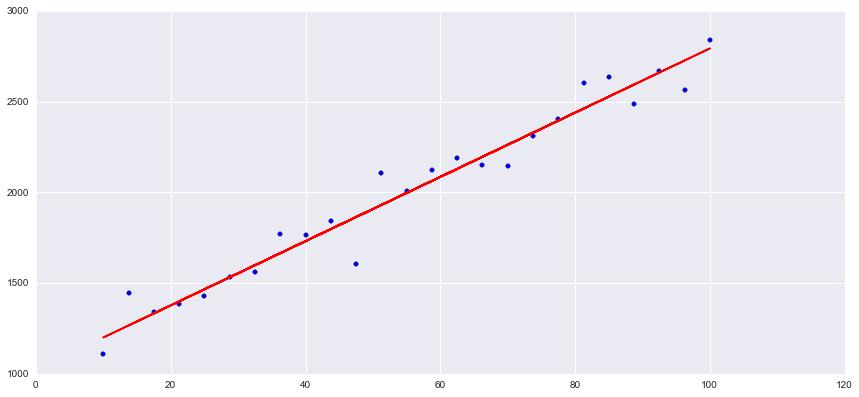

In [33]:
regr = linear_model.LinearRegression()
regr.fit(X,y)

y_hat_2 = regr.predict(X)


breg = BayesRegr(num_features,fit_intercept=True)
breg.train(X,y)

y_hat = []
for i in range(num_data):
    y_hat += [breg.predict_ML_x(X[i])]
    
y_hat = np.array(y_hat) 

if num_features == 1:
    plt.scatter(X,y)
    plt.plot(X,y_hat,color = 'r')

print('error of ols: %i, \nerror of predictive mean: %i'%(round(np.sum((y - y_hat_2)**2)),round(np.sum((y - y_hat)**2))))

In [6]:
draw_list = []

C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


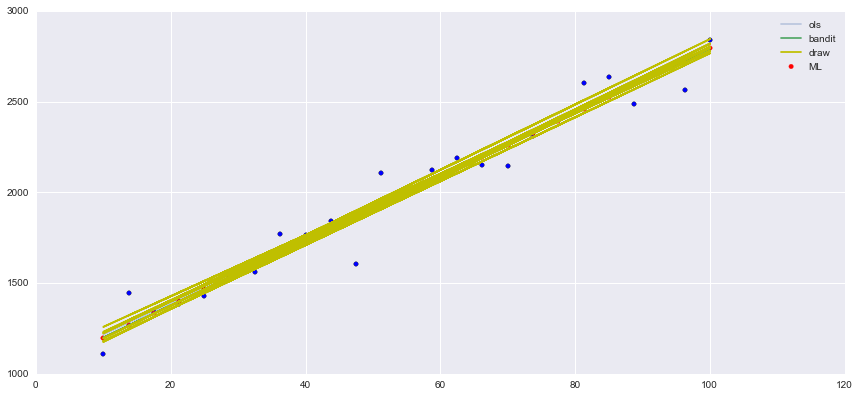

In [34]:
if num_features ==1:
    num_draws = 10
    plt.scatter(X,y)

    plt.plot(X,regr.predict(X),label = 'ols',alpha=.3)
    plt.scatter(X,y_hat,color = 'r',label = 'ML')


    y_hat = []
    for i in range(num_data):
        y_hat += [breg.predict_ML_x(X[i])]

    y_hat = np.array(y_hat) 

    plt.plot(X,y_hat,label='bandit')
    #plt.plot(X,X*beta,label='stream')

    for i in range(num_draws-1):
        w = breg.draw()
        draw_list += [w]
    #plt.plot(X,X*w,label='draws')
    #draw = w.dot(test.add_intercept(X[1]))
    #draw_list +=[draw]

        plt.plot(X,w[0]+w[1]*X,color = 'y')
    plt.plot(X,w[0]+w[1]*X,label='draw',color = 'y')

    plt.legend()


# Contextual Bandit Problems

### Thompson sampler


In [372]:
import itertools

class LinearThompson(object):
    def __init__(self,num_contexts,alpha = 1,beta = 1,v=1000,fit_intercept=False,num_arms = 1):
        self.arms = [list(i) for i in itertools.product([0., 1.], repeat=num_arms)] # don't forget to make this floats, or make_b starts rounding stuff.
        self.fit_intercept = fit_intercept
        self.num_features = num_contexts + num_arms#num_features
        if self.fit_intercept == True:
            self.num_features += 1
            
        self.B = np.eye(self.num_features)*alpha
        self.Binv = np.linalg.inv(self.B)
        #print(self.num_features)
        self.f = np.atleast_2d(np.zeros(self.num_features))#np.array([0,0]) #np.zeros(shape=(num_features,))
        #print(self.f)
        self.mu = np.zeros(num_features)
        self.beta = beta
        self.v = v
        
    def add_intercept(self,X):
        if self.fit_intercept==False:
            return X
        else:
            X_new= np.atleast_2d(np.insert(X,0,1.))
            #print(X_new.shape)
            #print(X_new.T.shape)
            return X_new.T#np.atleast_2d(np.append(X[::-1],1))#[::-1])
        
    def make_b(self,arm,context):
        return self.add_intercept(np.insert(context,0,arm))
        
        
    def observe_x(self,x,y):
        y = np.atleast_2d(y)
        x = self.add_intercept(x)
        #print(self.B.shape,x.shape)

        self.B += np.outer(x,x)
        #print(x.T.shape,y.shape)
        #print(np.dot(x,y))
        self.f += np.dot(x,y).T
        


        
    def train(self,X,y,shuffle = True):
        index = list(range(X.shape[0]))
        if shuffle ==True:
            np.random.shuffle(index)
        for i in index:
            self.observe_x(X[i],y[i]) 
            
    def predict_ML_x(self,x):
        beta = np.linalg.inv(self.B).dot(self.f.T)
        x = self.add_intercept(x)
        try:
            return x.T.dot(beta)[0][0]
        except:
            y_hat = x*beta
            return y_hat[0]

        
    def predict_ML(self,X):
        beta= np.linalg.inv(self.B).dot(self.f.T)

        y = []
        try:
            for i in range(len(X)):
                x = X[i]
                y += [self.predict_ML_x(x)]
                #y +=[x.dot(beta)]
                return y
        except:
            X = self.add_intercept(X)
            return X.T.dot(beta)
        
        
        
            
    def draw(self):
        B_inv = np.linalg.inv(self.B)
        mu_t = B_inv.dot(self.f.T)
        dist = stats.multivariate_normal
        #print(mu_t.shape,B_inv)
        return dist.rvs(mean=mu_t.flatten(),cov=self.v**2*B_inv)
    
    def choose_arm(self,context):
        reward_list = []
        for i in range(len(self.arms)):
            b = self.make_b(self.arms[i],context)
            norm = np.atleast_2d(self.draw())
            reward = np.dot(b.T,norm.T)
            reward_list += [reward]
        return np.argmax(reward_list)
    
    def update(self,arm,context,reward):
        y = np.atleast_2d(reward)
        x = self.make_b(self.arms[arm],context)
        self.B += np.outer(x,x)
        self.f += np.dot(x,y).T
            
        
        
    


C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


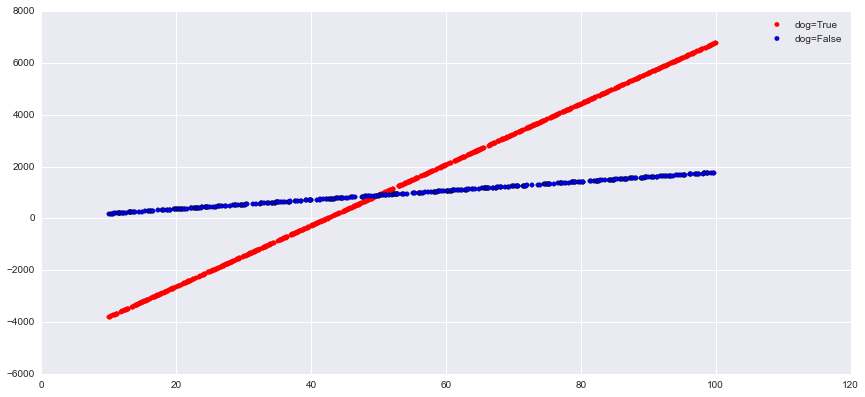

In [373]:
X_ = np.array([1,2,3])
arm = np.array([1,2])

num_arms = 1
num_contexts = 1
num_data = 1000

#create X
X = np.zeros((num_data,num_contexts + num_arms))
for i in range(num_contexts):
    X[:,i] = np.linspace(10,100,num_data).T
    
for i in range(num_arms):
    X[:,i+num_contexts] = np.random.binomial(1,.6,num_data)
X[:10,:]
    
#create target value y
#np.random.shuffle(X)
def evaluate(X):
    y = 0
    #coefs = np.random.normal(0,10,X.shape[0])
    try:
        for i in range(num_contexts):
            np.random.seed(i)
            y += X[i]*np.random.normal(0,10)
            
        for i in range(num_arms):
            y += X[i+num_contexts]*100*X[0]+X[i+num_contexts]*-5000
        return y
    
    except:
        print('ex')
        return  X*12
y1 = []
for i in range(num_data):
    y1 += [evaluate(X[i,:])]
y1 = np.array(y1).flatten()#+np.random.normal(0,90,X.shape[0])
y1

if num_contexts + num_arms ==2:
    plt.scatter(X[:,0][X[:,1].astype(bool)],y1[X[:,1].astype(bool)],label='dog=True',color='r')
    plt.scatter(X[:,0][~X[:,1].astype(bool)],y1[~X[:,1].astype(bool)],label='dog=False')
    plt.legend()
    
#create context ( X without the arms)
cont = []
for i in range(num_data):
    cont += [X[i,:-1]]
    
np.random.shuffle(cont)

In [374]:
seed = 1

C:\Users\Trost\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


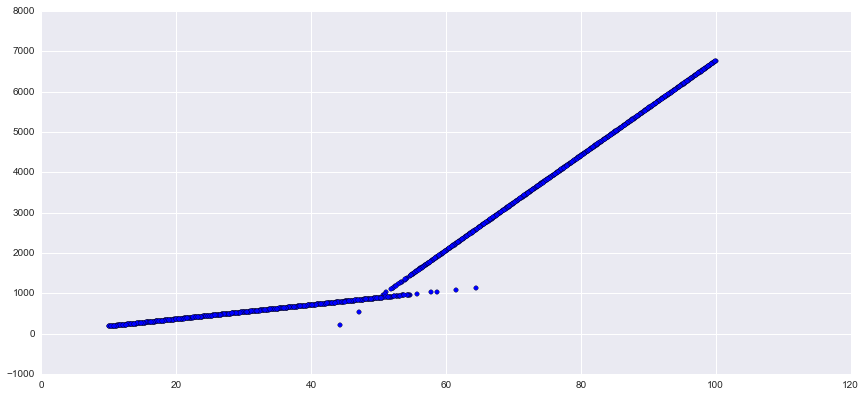

In [375]:
lth = LinearThompson(num_contexts = num_contexts,num_arms=num_arms,fit_intercept=True)
seed = seed +1
np.random.seed(seed)
y_hat_list = []
for i in range(num_data):
    arm = lth.choose_arm(cont[i])
    y_hat = evaluate([cont[i],arm])
    y_hat_list += [y_hat]
    lth.update(arm,cont[i],y_hat)
    
plt.scatter(cont,y_hat_list)

In [360]:
lth.B

array([[  1.00100000e+02,   1.00000000e+00,   5.50000000e+03],
       [  1.00000000e+00,   1.10000000e+00,   3.36363636e+01],
       [  5.50000000e+03,   3.36363636e+01,   3.71363736e+05]])

In [285]:
tmp = lth.make_b(X[3,:-1],1.)
tmp
#lth.add_intercept(X[0])

array([[  1.        ],
       [ 12.72727273],
       [ 12.72727273],
       [ 12.72727273],
       [  1.        ]])

In [257]:
lth.update(1,X_,1)
lth.B
lth.draw().shape
tmp

0

In [279]:
[list(i) for i in itertools.product([0, 1], repeat=num_arms)]

[[0], [1]]